In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as const
import pandas as pd
import cmcrameri as cmcm
import juanfit

In [2]:
sumer_list_excel = pd.read_excel("../../save/sumer_line_list_final.xlsx")

In [3]:
c = const.c.cgs/1.e5

In [4]:
sumer_list_excel

,ion,charge_stat,Z,A,temp,wvl_fit,wvl_chianti,fwhm_fit,fwhm_err,fwhm_true,fwhm_awsom
0,Fe,xi,10,55.85000,6.0,680.450,680.406,0.3380,0.0100,0.27131,0.172
1,Na,ix,8,22.98977,5.9,681.760,681.719,0.3000,0.0030,0.21883,0.175
2,Mg,viii,7,24.31000,5.9,689.633,689.641,0.2800,0.0040,0.19546,0.170
3,Ca,ix,8,40.08000,5.8,691.435,691.424,0.3140,0.0400,0.24079,0.159
4,Si,ix,8,28.08550,5.9,694.739,694.686,0.2590,0.0090,0.16049,0.185
5,Fe,viii,7,55.85000,5.8,697.151,697.156,0.2690,0.0020,0.17999,0.154
6,Al,ix,8,26.98154,5.9,703.634,703.730,0.2850,0.0500,0.20032,0.185
7,Mg,ix,8,24.31000,5.9,706.679,706.060,0.2960,0.0020,0.21519,0.183
8,Ar,viii,7,39.94800,5.7,713.784,713.801,0.2710,0.0040,0.17959,0.166
9,Mg,ix,8,24.31000,5.9,749.524,749.552,0.2870,0.0020,0.20265,0.195


In [5]:
sumer_list_excel = sumer_list_excel.drop([0,3,6,25])

In [6]:
sumer_list_excel

,ion,charge_stat,Z,A,temp,wvl_fit,wvl_chianti,fwhm_fit,fwhm_err,fwhm_true,fwhm_awsom
1,Na,ix,8,22.98977,5.9,681.760,681.719,0.3000,0.0030,0.21883,0.175
2,Mg,viii,7,24.31000,5.9,689.633,689.641,0.2800,0.0040,0.19546,0.170
4,Si,ix,8,28.08550,5.9,694.739,694.686,0.2590,0.0090,0.16049,0.185
5,Fe,viii,7,55.85000,5.8,697.151,697.156,0.2690,0.0020,0.17999,0.154
7,Mg,ix,8,24.31000,5.9,706.679,706.060,0.2960,0.0020,0.21519,0.183
8,Ar,viii,7,39.94800,5.7,713.784,713.801,0.2710,0.0040,0.17959,0.166
9,Mg,ix,8,24.31000,5.9,749.524,749.552,0.2870,0.0020,0.20265,0.195
10,Mg,viii,7,24.31000,5.8,762.650,762.660,0.2570,0.0040,0.15926,0.187
11,Mg,viii,7,24.31000,5.8,769.411,769.355,0.3130,0.0030,0.24546,0.189
12,Ne,viii,7,20.17900,5.8,770.424,770.428,0.2990,0.0010,0.22347,0.191


In [7]:
sumer_awsom_diff = (sumer_list_excel["fwhm_true"] - sumer_list_excel["fwhm_awsom"]) \
                /sumer_list_excel["wvl_chianti"]*c

sumer_awsom_diff_err = sumer_list_excel["fwhm_err"]*sumer_list_excel["fwhm_fit"] \
                /sumer_list_excel["fwhm_true"]/sumer_list_excel["wvl_chianti"]*c

In [8]:
line_name = sumer_list_excel["ion"] + r" \textsc{"+ sumer_list_excel["charge_stat"] + r"}" + ((sumer_list_excel["wvl_chianti"].values).astype("int")).astype("str")

In [9]:
line_name

1        Na \textsc{ix}681
2      Mg \textsc{viii}689
4        Si \textsc{ix}694
5      Fe \textsc{viii}697
7        Mg \textsc{ix}706
8      Ar \textsc{viii}713
9        Mg \textsc{ix}749
10     Mg \textsc{viii}762
11     Mg \textsc{viii}769
12     Ne \textsc{viii}770
13     Mg \textsc{viii}772
14         S \textsc{x}776
15     Ne \textsc{viii}780
16     Mg \textsc{viii}782
17       Fe \textsc{x}1028
18     Fe  \textsc{xi}1028
19       O \textsc{vi}1031
20       O \textsc{vi}1037
21    Si  \textsc{vii}1049
22     Al \textsc{vii}1053
23        Mg \textsc{x}609
24        Mg \textsc{x}624
dtype: object

In [10]:
Z_A = sumer_list_excel["Z"]/sumer_list_excel["A"]
Z2_A = np.square(sumer_list_excel["Z"])/sumer_list_excel["A"]


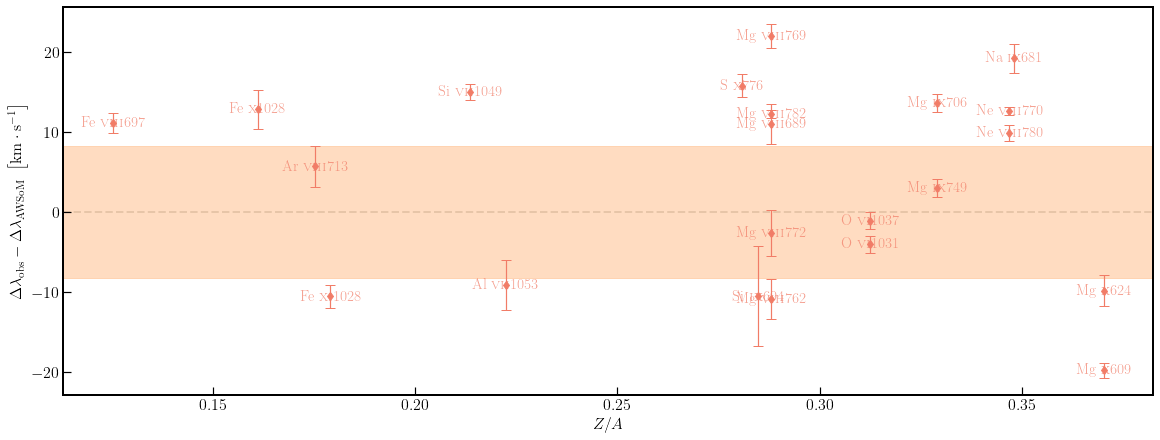

In [11]:
fig, ax = plt.subplots(figsize=(16,6),constrained_layout=True)
for ii in sumer_list_excel.index:
    ax.errorbar(Z_A[ii],sumer_awsom_diff[ii],sumer_awsom_diff_err[ii],
            marker="d",ls="none",capsize=5,lw=1.2,color = "#F17C67",zorder=15)

    ax.text(Z_A[ii],sumer_awsom_diff[ii],line_name[ii],ha = 'center',va = 'center',
                fontsize = 15,linespacing=1.5,color = "#F17C67",alpha=0.7)
# for ii in range(len(line_id_latex)):
#     text_yloc = np.log10(temp_aver[ii])
#     #print(color_select)
#     ax.text(line_z2a[ii],text_yloc,line_id_latex[ii],ha = 'center',va = 'center',
#        color = color_cycle[int(ii%4)],fontsize = 15,linespacing=1.5)
        
                 
# #bax.text(0.3,6.6,"good")
ax.tick_params(labelsize=16)
ax.set_xlabel(r"$Z/A$",fontsize=16)
ax.axhline(0,color="#BDC0BA",ls="--",lw=2,alpha=0.7,zorder=0)
ax.set_ylabel(r"$\Delta \lambda_{\rm obs} - \Delta \lambda_{\rm AWSoM}\ \left[\mathrm{km \cdot s^{-1}}\right]$",
fontsize=16)

ax.axhspan(ymin=-0.022/800.*c.value,ymax=0.022/800.*c.value,alpha=0.5,color="#FFBA84")

ax.tick_params(which="major",width=1.2,length=8,direction="in")
ax.tick_params(which="minor",width=1.2,length=4,direction="in")

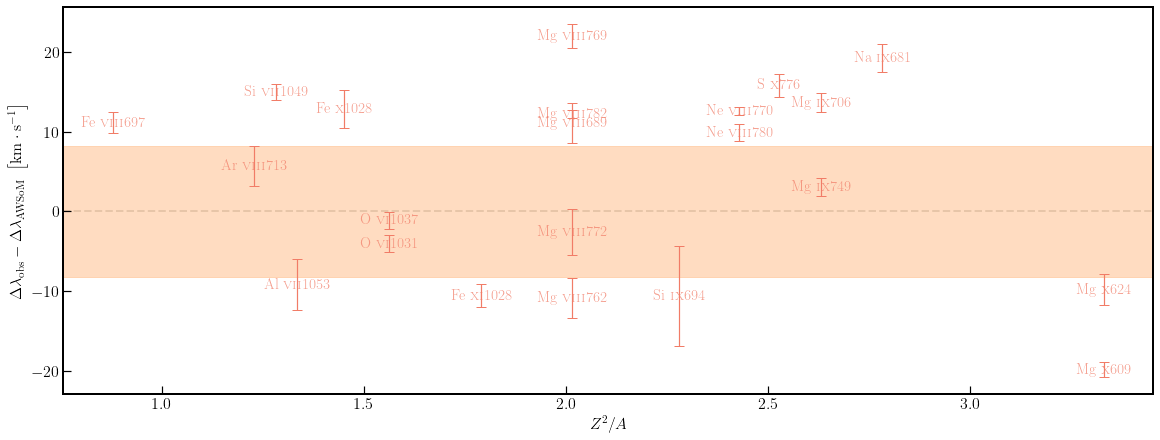

In [12]:
fig, ax = plt.subplots(figsize=(16,6),constrained_layout=True)
for ii in sumer_list_excel.index:
    ax.errorbar(Z2_A[ii],sumer_awsom_diff[ii],sumer_awsom_diff_err[ii],
            marker=None,ls="none",capsize=5,lw=1.2,color = "#F17C67",zorder=15)

    ax.text(Z2_A[ii],sumer_awsom_diff[ii],line_name[ii],ha = 'center',va = 'center',
                fontsize = 15,linespacing=1.5,color = "#F17C67",alpha=0.7)
# for ii in range(len(line_id_latex)):
#     text_yloc = np.log10(temp_aver[ii])
#     #print(color_select)
#     ax.text(line_z2a[ii],text_yloc,line_id_latex[ii],ha = 'center',va = 'center',
#        color = color_cycle[int(ii%4)],fontsize = 15,linespacing=1.5)
        
                 
# #bax.text(0.3,6.6,"good")
ax.tick_params(labelsize=16)
ax.set_xlabel(r"$Z^2/A$",fontsize=16)
ax.axhline(0,color="#BDC0BA",ls="--",lw=2,alpha=0.7,zorder=0)
ax.set_ylabel(r"$\Delta \lambda_{\rm obs} - \Delta \lambda_{\rm AWSoM}\ \left[\mathrm{km \cdot s^{-1}}\right]$",
fontsize=16)

ax.axhspan(ymin=-0.022/800.*c.value,ymax=0.022/800.*c.value,alpha=0.5,color="#FFBA84")

ax.tick_params(which="major",width=1.2,length=8,direction="in")
ax.tick_params(which="minor",width=1.2,length=4,direction="in")

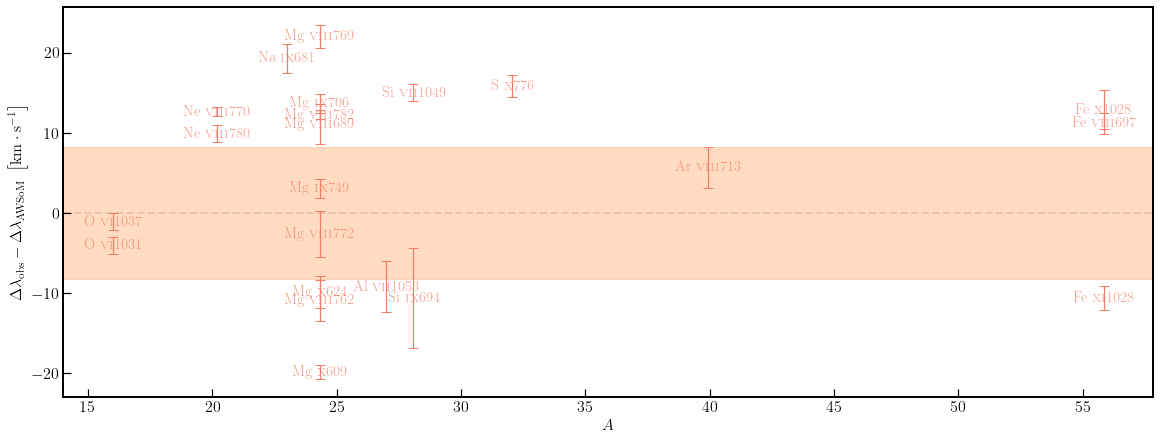

In [13]:
fig, ax = plt.subplots(figsize=(16,6),constrained_layout=True)
for ii in sumer_list_excel.index:
    ax.errorbar(sumer_list_excel["A"][ii],sumer_awsom_diff[ii],sumer_awsom_diff_err[ii],
            marker=None,ls="none",capsize=5,lw=1.2,color = "#F17C67",zorder=15)

    ax.text(sumer_list_excel["A"][ii],sumer_awsom_diff[ii],line_name[ii],ha = 'center',va = 'center',
                fontsize = 15,linespacing=1.5,color = "#F17C67",alpha=0.7)
# for ii in range(len(line_id_latex)):
#     text_yloc = np.log10(temp_aver[ii])
#     #print(color_select)
#     ax.text(line_z2a[ii],text_yloc,line_id_latex[ii],ha = 'center',va = 'center',
#        color = color_cycle[int(ii%4)],fontsize = 15,linespacing=1.5)
        
                 
# #bax.text(0.3,6.6,"good")
ax.tick_params(labelsize=16)
ax.set_xlabel(r"$A$",fontsize=16)
ax.axhline(0,color="#BDC0BA",ls="--",lw=2,alpha=0.7,zorder=0)
ax.set_ylabel(r"$\Delta \lambda_{\rm obs} - \Delta \lambda_{\rm AWSoM}\ \left[\mathrm{km \cdot s^{-1}}\right]$",
fontsize=16)

ax.axhspan(ymin=-0.022/800.*c.value,ymax=0.022/800.*c.value,alpha=0.5,color="#FFBA84")

ax.tick_params(which="major",width=1.2,length=8,direction="in")
ax.tick_params(which="minor",width=1.2,length=4,direction="in")

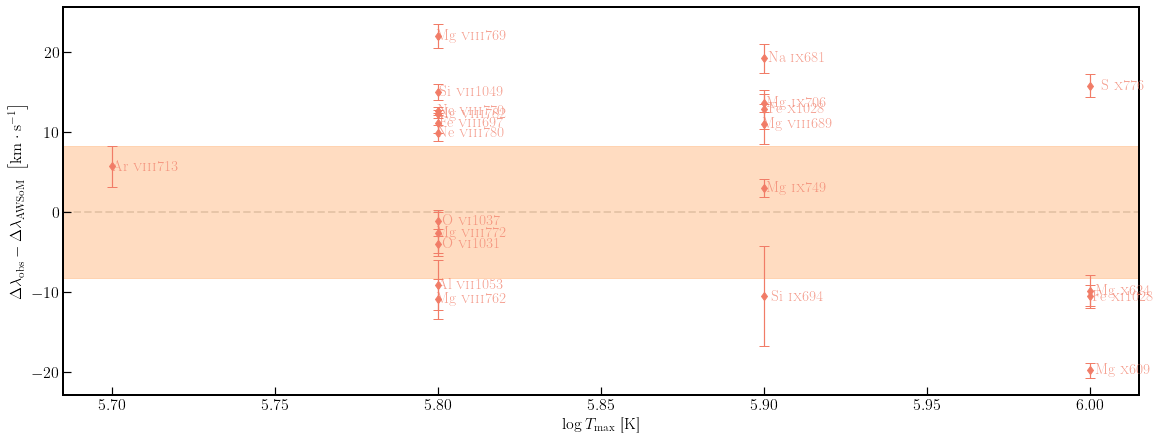

In [14]:
fig, ax = plt.subplots(figsize=(16,6),constrained_layout=True)
for ii in sumer_list_excel.index:
    ax.errorbar(sumer_list_excel["temp"][ii],sumer_awsom_diff[ii],sumer_awsom_diff_err[ii],
            marker="d",ls="none",capsize=5,lw=1.2,color = "#F17C67",zorder=15)

    ax.text(sumer_list_excel["temp"][ii]+0.01,sumer_awsom_diff[ii],line_name[ii],ha = 'center',va = 'center',
                fontsize = 15,linespacing=1.5,color = "#F17C67",alpha=0.7)
# for ii in range(len(line_id_latex)):
#     text_yloc = np.log10(temp_aver[ii])
#     #print(color_select)
#     ax.text(line_z2a[ii],text_yloc,line_id_latex[ii],ha = 'center',va = 'center',
#        color = color_cycle[int(ii%4)],fontsize = 15,linespacing=1.5)
        
                 
# #bax.text(0.3,6.6,"good")
ax.tick_params(labelsize=16)
ax.set_xlabel(r"$\log T_{\rm max}$ [K]",fontsize=16)
ax.axhline(0,color="#BDC0BA",ls="--",lw=2,alpha=0.7,zorder=0)
ax.set_ylabel(r"$\Delta \lambda_{\rm obs} - \Delta \lambda_{\rm AWSoM}\ \left[\mathrm{km \cdot s^{-1}}\right]$",
fontsize=16)

ax.axhspan(ymin=-0.022/800.*c.value,ymax=0.022/800.*c.value,alpha=0.5,color="#FFBA84")

ax.tick_params(which="major",width=1.2,length=8,direction="in")
ax.tick_params(which="minor",width=1.2,length=4,direction="in")